In [1]:
import mmdet

In [2]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.7.10 (default, Feb 26 2021, 18:47:35) [GCC 7.3.0]
CUDA available: True
MUSA available: False
numpy_random_seed: 2147483648
GPU 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, V11.1.105
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.9.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=comput

In [4]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

mkdir: cannot create directory ‘./checkpoints’: File exists
processing rtmdet_tiny_8xb32-300e_coco...
rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth exists in /mmdetection/notebooks/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /mmdetection/notebooks/checkpoints


In [5]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [6]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'
# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = '/mmdetection/demo/demo.jpg'
result = inferencer(img, out_dir='/mmdetection/notebooks/output')

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

09/02 11:47:33 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their 
associated APIs are an experimental feature and subject to change. Please do not use them for anything important 
until they are released as stable. (Triggered internally at  
/opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be 
removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This 
results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 
torch.div(a, b, rounding_mode='floor'). (Triggered internally at  
/opt/conda/conda-bld/pytorch_1623448265233/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

In [7]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)


{
│   'predictions': [
│   │   {
│   │   │   'labels': [13, 2, 2, 2, ... +296],
│   │   │   'scores': [0.8703847527503967, 0.7677163481712341, 0.7427440285682678, 0.6994036436080933, ... +296],
│   │   │   'bboxes': [
│   │   │   │   [221.36956787109375, 176.13082885742188, 456.26214599609375, 383.2405700683594],
│   │   │   │   [295.34979248046875, 117.18389892578125, 378.5702819824219, 150.27098083496094],
│   │   │   │   [190.57333374023438, 109.70957946777344, 299.5224609375, 155.03981018066406],
│   │   │   │   [431.3689270019531, 104.985107421875, 484.87908935546875, 131.94046020507812],
│   │   │   │   ... +296
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

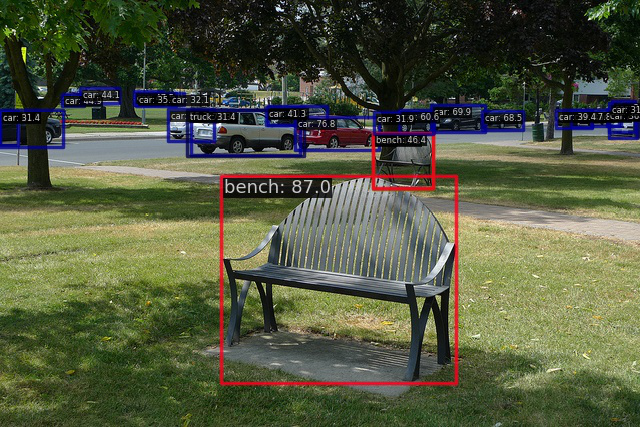

In [8]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

In [9]:
ls

checkpoints/  data/  notebooks.ipynb*  output/  work_dirs/


In [10]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [11]:
# Download the data and unzip it
!python /mmdetection/tools/misc/download_dataset.py --dataset-name balloon --save-dir data --unzip

Unzipping balloon_dataset.zip


In [12]:
# import os.path as osp
# import mmcv
# from mmengine.fileio import dump, load
# from mmengine.utils import track_iter_progress

# def convert_balloon_to_coco(ann_file, out_file, image_prefix):
#     data_infos = load(ann_file)

#     annotations = []
#     images = []
#     obj_count = 0
#     for idx, v in enumerate(track_iter_progress(data_infos.values())):
#         filename = v['filename']
#         img_path = osp.join(image_prefix, filename)
#         height, width = mmcv.imread(img_path).shape[:2]

#         images.append(
#             dict(id=idx, file_name=filename, height=height, width=width))
        
#         for _, obj in v['regions'].items():
#             assert not obj['region_attributes']
#             obj = obj['shape_attributes']
#             px = obj['all_points_x']
#             py = obj['all_points_y']
#             poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
#             poly = [p for x in poly for p in x]

#             x_min, y_min, x_max, y_max = (min(px), min(py), max(px), max(py))

#             data_anno = dict(
#                 image_id=idx,
#                 id=obj_count,
#                 category_id=0,
#                 bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
#                 area=(x_max - x_min) * (y_max - y_min),
#                 segmentation=[poly],
#                 iscrowd=0)
#             annotations.append(data_anno)
#             obj_count += 1

#     coco_format_json = dict(
#         images=images,
#         annotations=annotations,
#         categories=[{
#             'id': 0,
#             'name': 'balloon'
#         }])
#     dump(coco_format_json, out_file)

# if __name__ == '__main__':
#     convert_balloon_to_coco(ann_file='data/balloon/train/via_region_data.json',
#                             out_file='data/balloon/train.json',
#                             image_prefix='data/balloon/train')
#     convert_balloon_to_coco(ann_file='data/balloon/val/via_region_data.json',
#                             out_file='data/balloon/val.json',
#                             image_prefix='data/balloon/val')

In [13]:
import os.path as osp
import mmcv
from mmengine.fileio import dump, load
from mmengine.utils import track_iter_progress

def convert_balloon_to_coco(ann_file, out_file, image_prefix):
    data_infos = load(ann_file)

    annotations = []
    images = []
    obj_count = 0
    
    # Convert dict_values to a list
    data_infos_list = list(data_infos.values())
    
    for idx, v in enumerate(track_iter_progress(data_infos_list)):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(
            dict(id=idx, file_name=filename, height=height, width=width))
        
        for _, obj in v['regions'].items():
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj['all_points_x']
            py = obj['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (min(px), min(py), max(px), max(py))

            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=[poly],
                iscrowd=0)
            annotations.append(data_anno)
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{
            'id': 0,
            'name': 'balloon'
        }])
    dump(coco_format_json, out_file)

if __name__ == '__main__':
    convert_balloon_to_coco(ann_file='data/balloon/train/via_region_data.json',
                            out_file='data/balloon/train.json',
                            image_prefix='data/balloon/train')
    convert_balloon_to_coco(ann_file='data/balloon/val/via_region_data.json',
                            out_file='data/balloon/val.json',
                            image_prefix='data/balloon/val')


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 114.0 task/s, elapsed: 1s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 13/13, 102.2 task/s, elapsed: 0s, ETA:     0s


In [14]:
ls 

checkpoints/  data/  notebooks.ipynb*  output/  work_dirs/


In [15]:
!cp -r checkpoints /mmdetection/configs/rtmdet

In [16]:
!pip install setuptools==58.0.0
!pip install --upgrade future tensorboard

In [17]:
config_balloon = """
# Inherit and overwrite part of the config based on this config
_base_ = 'checkpoints/rtmdet_tiny_8xb32-300e_coco.py'

data_root = 'data/balloon/' # dataset root

train_batch_size_per_gpu = 4
train_num_workers = 2

max_epochs = 20
stage2_num_epochs = 1
base_lr = 0.00008


metainfo = {
    'classes': ('balloon', ),
    'palette': [
        (220, 20, 60),
    ]
}

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='train/'),
        ann_file='train.json'))

val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='val/'),
        ann_file='val.json'))

test_dataloader = val_dataloader

val_evaluator = dict(ann_file=data_root + 'val.json')

test_evaluator = val_evaluator

model = dict(bbox_head=dict(num_classes=1))

# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=10),
    dict(
        # use cosine lr from 10 to 20 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(640, 640),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    _delete_=True,
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=0.05),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

default_hooks = dict(
    checkpoint=dict(
        interval=5,
        max_keep_ckpts=2,  # only keep latest 2 checkpoints
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=1)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])
"""

with open('/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_balloon.py', 'w') as f:
    f.write(config_balloon)

In [18]:
!python /mmdetection/tools/train.py /mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_balloon.py

09/02 11:47:40 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Feb 26 2021, 18:47:35) [GCC 7.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 964811367
    GPU 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.9.0
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gen

09/02 11:47:43 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
09/02 11:47:43 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
(NORMAL      ) PipelineSwitchHook                 
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_i

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
09/02 11:47:45 - mmengine - INFO - load backbone. in model from: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-tiny_imagenet_600e.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-tiny_imagenet_600e.pth
Downloading: "https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-tiny_imagenet_600e.pth" to /root/.cache/torch/hub/checkpoints/cspnext-tiny_imagenet_600e.pth
100%|██████████████████████████████████████| 31.5M/31.5M [00:02<00:00, 13.3MB/s]
Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.rtm_cls.0.weight: copying a param with sh

09/02 11:47:53 - mmengine - INFO - The best checkpoint with 0.0300 coco/bbox_mAP at 2 epoch is saved to best_coco_bbox_mAP_epoch_2.pth.
09/02 11:47:54 - mmengine - INFO - Epoch(train)  [3][ 5/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:31  time: 0.1126  data_time: 0.0138  memory: 1336  loss: 2.7345  loss_cls: 2.0979  loss_bbox: 0.6367
09/02 11:47:54 - mmengine - INFO - Epoch(train)  [3][10/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:30  time: 0.1103  data_time: 0.0123  memory: 1338  loss: 2.7295  loss_cls: 2.0984  loss_bbox: 0.6311
09/02 11:47:55 - mmengine - INFO - Epoch(train)  [3][15/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:29  time: 0.1080  data_time: 0.0111  memory: 1333  loss: 2.7178  loss_cls: 2.0916  loss_bbox: 0.6262
09/02 11:47:55 - mmengine - INFO - Exp name: rtmdet_tiny_1xb4-20e_balloon_20240902_114739
09/02 11:47:55 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per ima

09/02 11:48:04 - mmengine - INFO - Epoch(train)  [6][ 5/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:24  time: 0.0998  data_time: 0.0122  memory: 1336  loss: 2.4331  loss_cls: 1.9290  loss_bbox: 0.5042
09/02 11:48:05 - mmengine - INFO - Epoch(train)  [6][10/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:24  time: 0.0997  data_time: 0.0122  memory: 1336  loss: 2.3493  loss_cls: 1.8550  loss_bbox: 0.4943
09/02 11:48:05 - mmengine - INFO - Epoch(train)  [6][15/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:23  time: 0.1045  data_time: 0.0168  memory: 1332  loss: 2.2478  loss_cls: 1.7758  loss_bbox: 0.4719
09/02 11:48:06 - mmengine - INFO - Exp name: rtmdet_tiny_1xb4-20e_balloon_20240902_114739
09/02 11:48:06 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  

09/02 11:48:16 - mmengine - INFO - Epoch(train)  [9][10/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:19  time: 0.1057  data_time: 0.0166  memory: 1331  loss: 1.4779  loss_cls: 1.0951  loss_bbox: 0.3828
09/02 11:48:17 - mmengine - INFO - Epoch(train)  [9][15/16]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 0:00:18  time: 0.1015  data_time: 0.0120  memory: 1343  loss: 1.4296  loss_cls: 1.0557  loss_bbox: 0.3738
09/02 11:48:17 - mmengine - INFO - Exp name: rtmdet_tiny_1xb4-20e_balloon_20240902_114739
09/02 11:48:17 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.595
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.709
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=10

09/02 11:48:27 - mmengine - INFO - Exp name: rtmdet_tiny_1xb4-20e_balloon_20240902_114739
09/02 11:48:28 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.628
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.730
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.707
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.219
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.222
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.702
 Ave

09/02 11:48:41 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.661
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.777
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.747
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.277
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.795
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.698
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.772
 Average Recal

09/02 11:48:48 - mmengine - INFO - Epoch(train) [19][ 5/16]  base_lr: 9.5997e-06 lr: 9.5997e-06  eta: 0:00:02  time: 0.1031  data_time: 0.0126  memory: 1339  loss: 0.9059  loss_cls: 0.6161  loss_bbox: 0.2898
09/02 11:48:48 - mmengine - INFO - Epoch(train) [19][10/16]  base_lr: 7.8096e-06 lr: 7.8096e-06  eta: 0:00:02  time: 0.1025  data_time: 0.0123  memory: 1331  loss: 0.8963  loss_cls: 0.6095  loss_bbox: 0.2869
09/02 11:48:49 - mmengine - INFO - Epoch(train) [19][15/16]  base_lr: 6.3487e-06 lr: 6.3487e-06  eta: 0:00:01  time: 0.1023  data_time: 0.0123  memory: 1332  loss: 0.8962  loss_cls: 0.6096  loss_bbox: 0.2866
09/02 11:48:49 - mmengine - INFO - Exp name: rtmdet_tiny_1xb4-20e_balloon_20240902_114739
09/02 11:48:49 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  

In [19]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./work_dirs

In [8]:
# load tensorboard in colab
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
# see curves in tensorboard
%tensorboard --logdir ./work_dirs --bind_all

In [10]:
!kill 90

In [21]:
# %reload_ext tensorboard
# # see curves in tensorboard
# %tensorboard --logdir ./work_dirs

In [22]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
config = '/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_balloon.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('./work_dirs/rtmdet_tiny_1xb4-20e_balloon/best_coco*.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
img = './data/balloon/val/4838031651_3e7b5ea5c7_b.jpg'
result = inferencer(img, out_dir='./output')

Output()

Loads checkpoint by local backend from path: ./work_dirs/rtmdet_tiny_1xb4-20e_balloon/best_coco_bbox_mAP_epoch_14.pth


/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.TensorboardVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


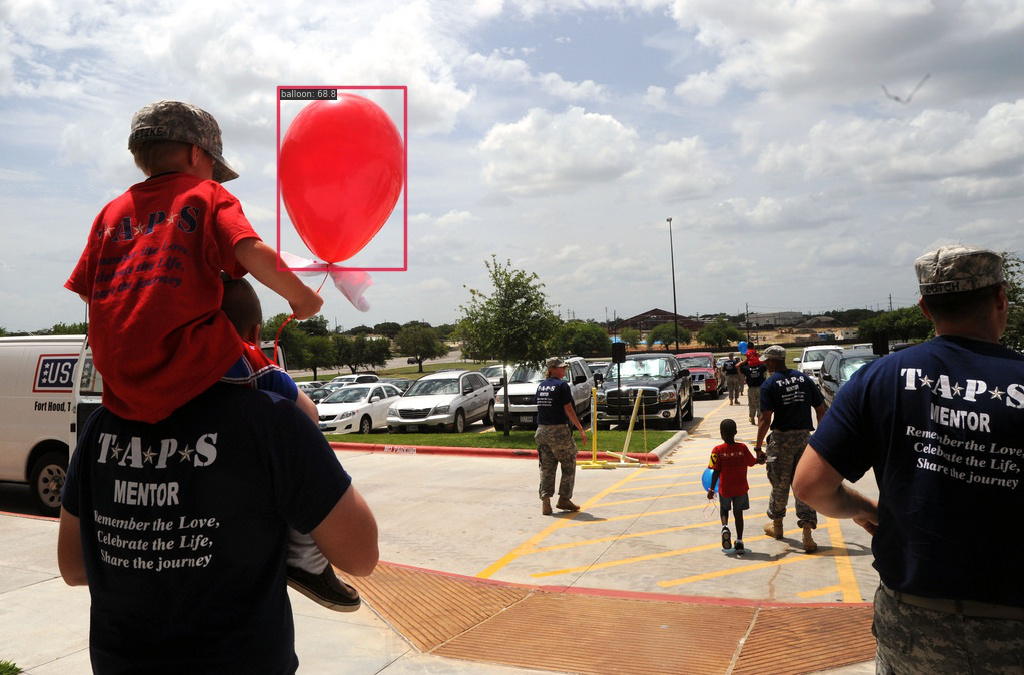

In [23]:
# Show the output image
Image.open('./output/vis/4838031651_3e7b5ea5c7_b.jpg')